## Codenation 2019 - ENEM 2016
O enunciado do exercício se encontra no arquivo README.md. O primeiro passo é entender a qualidade e características dos nossos dados.

### Parte 1 - Visão geral dos dados
Inicialmente, vamos carregar o arquivo de treinamento.



In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from ggplot import *

enem_df = pd.read_csv('train.csv')
print(enem_df.head(10))

   Unnamed: 0                              NU_INSCRICAO  NU_ANO  \
0           1  ed50e8aaa58e7a806c337585efee9ca41f1eb1ad    2016   
1           2  2c3acac4b33ec2b195d77e7c04a2d75727fad723    2016   
2           3  f4545f8ccb9ff5c8aad7d32951b3f251a26e6568    2016   
3           4  3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe    2016   
4           5  bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268    2016   
5           6  a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1    2016   
6           7  63b4e128e9ffe8ab27f5d093db1976ef4f353e0a    2016   
7           8  2eb189d4912f64b19d1967e8e84b6141aba18770    2016   
8           9  5822cb43e0800429be2084b3f86a63aaa73fa66c    2016   
9          10  94f7e277f87cd58e10a45da4ad5dd168651cf3ef    2016   

   CO_MUNICIPIO_RESIDENCIA NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA  \
0                  4314902            Porto Alegre                43   
1                  2304707                  Granja                23   
2                  2304400               Forta

Como primeiro passo, vamos descartar colunas que são desnecessárias ou que não fazem sentido. O índice importado pelo Pandas com o número de linha do arquivo CSV, o estado do candidato (já temos informação sobre a cidade, que é mais específica), o código da prova (que em teoria não deveria influenciar em nada a nota do candidato), e os vetores com respostas e gabaritos das provas, afinal para saber o resultado da nota bastaria aplicar uma função entre gabarito e respostas e teriamos 100% de acerto. Como o resultado desejado é apenas a nota de matemática, iremos deixar apenas este campo.

In [26]:
enem_df = enem_df[['NU_INSCRICAO','CO_UF_RESIDENCIA','SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA','TP_NACIONALIDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA','TP_ENSINO','IN_TREINEIRO','TP_DEPENDENCIA_ADM_ESC','IN_BAIXA_VISAO','IN_CEGUEIRA','IN_SURDEZ','IN_DISLEXIA','IN_DISCALCULIA','IN_SABATISTA','IN_GESTANTE','IN_IDOSO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','CO_PROVA_CN','CO_PROVA_CH','CO_PROVA_LC','CO_PROVA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TP_LINGUA','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','Q001','Q002','Q006','Q024','Q025','Q026','Q027','Q047']]
enem_df = enem_df.drop(columns=['SG_UF_RESIDENCIA'])
print(enem_df.head(5))

                               NU_INSCRICAO  CO_UF_RESIDENCIA  NU_IDADE  \
0  ed50e8aaa58e7a806c337585efee9ca41f1eb1ad                43        24   
1  2c3acac4b33ec2b195d77e7c04a2d75727fad723                23        17   
2  f4545f8ccb9ff5c8aad7d32951b3f251a26e6568                23        21   
3  3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe                33        25   
4  bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268                13        28   

  TP_SEXO  TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0       M            1                 1                1                4   
1       F            3                 1                2                0   
2       F            3                 1                3                0   
3       F            0                 1                1                9   
4       M            2                 1                1                4   

   TP_ESCOLA  TP_ENSINO  ...   NU_NOTA_COMP5  NU_NOTA_REDACAO  Q001  Q002  \
0  

In [27]:
print(enem_df.describe())

       CO_UF_RESIDENCIA      NU_IDADE   TP_COR_RACA  TP_NACIONALIDADE  \
count      13730.000000  13730.000000  13730.000000      13730.000000   
mean          30.736708     21.593809      2.185652          1.048871   
std            9.862405      7.043654      1.007285          0.258895   
min           11.000000     13.000000      0.000000          0.000000   
25%           23.000000     17.000000      1.000000          1.000000   
50%           31.000000     19.000000      3.000000          1.000000   
75%           35.000000     23.000000      3.000000          1.000000   
max           53.000000     67.000000      5.000000          4.000000   

       TP_ST_CONCLUSAO  TP_ANO_CONCLUIU     TP_ESCOLA    TP_ENSINO  \
count     13730.000000     13730.000000  13730.000000  4282.000000   
mean          1.782666         2.146176      1.353532     1.178888   
std           0.880734         3.217328      0.558472     0.565490   
min           1.000000         0.000000      1.000000     1.00

Vamos observar quantos registros contém um valor válido para nossa variável de resultado (nota de matemática):

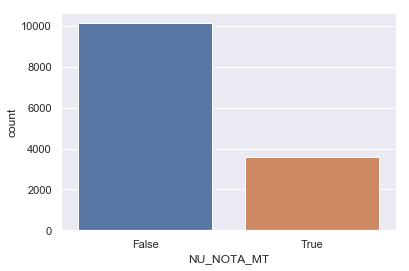

In [28]:
sns.set(style="darkgrid")
sns.countplot(enem_df.NU_NOTA_MT.isna())

In [29]:
print(enem_df['NU_INSCRICAO'].count())

13730


Como próximo passo podemos tentar entender a correlação entre as variáveis (ou colunas) do dataset. Como o Dataframe possui muitas colunas, vamos subdividir em dataframes menores, e depois de achar as melhores candidatas, vamos analisar a correlação entre elas para não pegarmos variáveis possivelmente linearmente dependentes.

In [30]:
print(len(enem_df.columns))

47


In [ ]:
enem_numbers_df = enem_df.drop(columns=['NO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA','NO_MUNICIPIO_NASCIMENTO','SG_UF_NASCIMENTO','NO_MUNICIPIO_ESC','SG_UF_ESC','NO_ENTIDADE_CERTIFICACAO','CO_MUNICIPIO_PROVA','NO_MUNICIPIO_PROVA','CO_UF_PROVA','SG_UF_PROVA'])

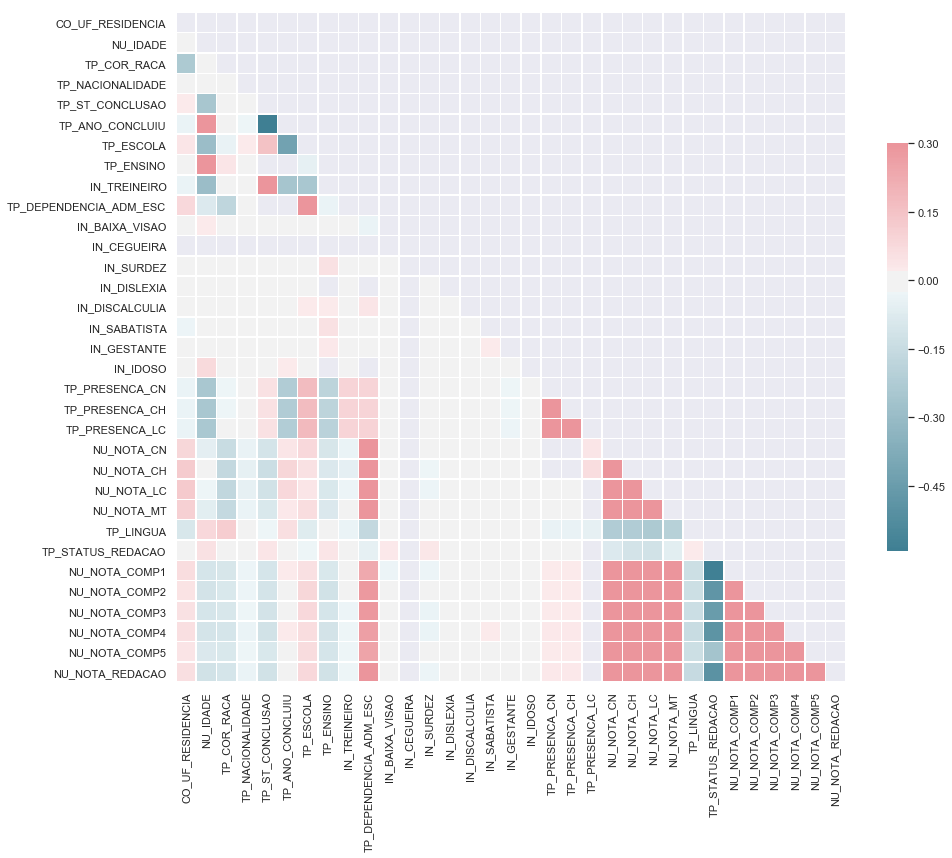

In [31]:
import matplotlib.pyplot as plt

corr =  enem_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})